tensor([[-0.1571],
        [-0.1571]])
Input shape: torch.Size([2, 1, 8, 17])
Target shape: torch.Size([2])


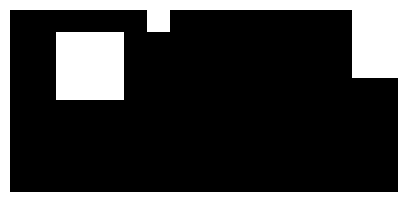

Target: 1.0
Output: tensor([-0.1571])


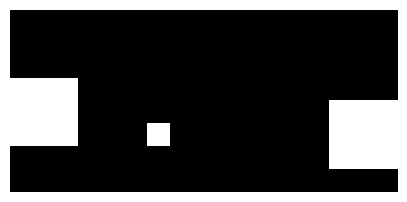

Target: 0.0
Output: tensor([-0.1571])
Output shape: torch.Size([2, 1])
Output values: tensor([[-0.1571],
        [-0.1571]])


In [6]:
from src.models.components.toy_vit_classification import ToyViTClassification
import torch
import matplotlib.pyplot as plt
from src.data.toy_classification_datamodule import ToyDataModuleClassification

# Example usage
from src.utils.data_functions.move_object import move_object_input_fn, move_object_target_fn

img_width = 8
img_height = 8

model = ToyViTClassification(img_width=img_width, img_height=img_height)

model.eval()
batch_size = 2

data = ToyDataModuleClassification(input_fn=move_object_input_fn, target_fn=move_object_target_fn, num_samples=40, batch_size=batch_size)
data.setup('fit')

# Visualize the input and output images for the first instance in the batch
def visualize_input(input_img, idx):
    fig, axs = plt.subplots(1, 1, figsize=(5, 5))
    axs.imshow(input_img[idx][0], cmap='gray')
    axs.axis('off')

    
    plt.show()

# Perform a forward pass
with torch.no_grad():
    for index, (input, target) in enumerate(data.train_dataloader()): 

        output = model(input)
        print(output)

        print("Input shape:", input.shape)
        print("Target shape:", target.shape)
        visualize_input(input, 0)
        print(f'Target: {target[0]}')
        print(f'Output: {output[0]}')
        visualize_input(input, 1)
        print(f'Target: {target[1]}')
        print(f'Output: {output[1]}')

        break



# Check the output shape
print("Output shape:", output.shape)

# Verify that the output values are between 0 and 1
print("Output values:", output)

In [2]:
from src.models.binary_grid_module import BinaryGridLightningModule

In [3]:
net = ToyViT(img_width=8, img_height=8)

In [ ]:
from functools import partial

In [4]:
model = BinaryGridLightningModule(
    net=net,
    optimizer=torch.optim.Adam,
    scheduler=None,
    compile=False
)

/Users/dgcnz/development/playground/pit_experiments/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'net' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['net'])`.


In [5]:
import hydra
import timm
from omegaconf import DictConfig, OmegaConf
from pathlib import Path
import lightning as L

In [6]:
data_cfg_path = Path('../configs/data/toy_mirror.yaml')
cfg = OmegaConf.load(data_cfg_path)
datamodule = hydra.utils.instantiate(cfg)
datamodule.setup("train")

In [ ]:
%cd ..

In [7]:
trainer = L.Trainer(max_epochs=100, accelerator="mps")

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [8]:
trainer.fit(model, datamodule)


  | Name         | Type              | Params | Mode 
-----------------------------------------------------------
0 | net          | ToyViT            | 1.5 K  | train
1 | criterion    | BCEWithLogitsLoss | 0      | train
2 | train_acc    | BinaryAccuracy    | 0      | train
3 | val_acc      | BinaryAccuracy    | 0      | train
4 | test_acc     | BinaryAccuracy    | 0      | train
5 | train_loss   | MeanMetric        | 0      | train
6 | val_loss     | MeanMetric        | 0      | train
7 | test_loss    | MeanMetric        | 0      | train
8 | val_acc_best | MaxMetric         | 0      | train
-----------------------------------------------------------
1.5 K     Trainable params
0         Non-trainable params
1.5 K     Total params
0.006     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/dgcnz/development/playground/pit_experiments/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/dgcnz/development/playground/pit_experiments/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/Users/dgcnz/development/playground/pit_experiments/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [ ]:
datamodule.setup("train")
train_dataloader =datamodule.train_dataloader()

In [ ]:
x, y = next(iter(train_dataloader))

In [20]:
model = model.to("cpu")

In [22]:
model(x)

tensor([[[[0.6233, 0.6225, 0.6232,  ..., 0.6230, 0.6205, 0.6207],
          [0.6231, 0.6226, 0.6194,  ..., 0.6231, 0.6216, 0.6224],
          [0.6229, 0.6206, 0.6234,  ..., 0.6233, 0.6230, 0.6226],
          ...,
          [0.6220, 0.6225, 0.6218,  ..., 0.6205, 0.6242, 0.6212],
          [0.6213, 0.6209, 0.6210,  ..., 0.6200, 0.6219, 0.6215],
          [0.6205, 0.6216, 0.6210,  ..., 0.6246, 0.6232, 0.6206]]],


        [[[0.6235, 0.6213, 0.6228,  ..., 0.6221, 0.6212, 0.6215],
          [0.6252, 0.6218, 0.6197,  ..., 0.6247, 0.6204, 0.6212],
          [0.6226, 0.6221, 0.6219,  ..., 0.6211, 0.6207, 0.6231],
          ...,
          [0.6233, 0.6216, 0.6234,  ..., 0.6206, 0.6254, 0.6224],
          [0.6216, 0.6217, 0.6222,  ..., 0.6185, 0.6233, 0.6212],
          [0.6199, 0.6211, 0.6208,  ..., 0.6270, 0.6234, 0.6203]]],


        [[[0.6234, 0.6211, 0.6231,  ..., 0.6236, 0.6210, 0.6210],
          [0.6229, 0.6198, 0.6199,  ..., 0.6224, 0.6220, 0.6221],
          [0.6227, 0.6198, 0.6239,  ..